<div dir="rtl">
    <h2 dir="auto" id="سوال-دوم">سوال دوم<a class="anchorLink" href="#سوال-دوم" style="visibility: hidden;">🔗</a></h2>
    <p dir="auto">یکی از راه‌های سود شرکت‌های فروش آنلاین، روش‌های حمل و نقل ویژه است. معمولاً شرکت‌ها سرویس‌های خاصی را به مشتریان می‌فروشند که در ازای پول بیشتر، اجناس را سریع‌تر ارسال می‌کنند. شرکتی که داده‌های آن در اختیار شما قرار داده شده است، می‌خواهد بداند که هر order، احتمالاً با چه ship mode انجام شده است. با داشتن این اطلاعات، شرکت می‌تواند با اندکی تخفیف درباره‌ی انواع مختلف حمل و نقل، مشتریان را تشویق کند تا به سراغ سرویس‌های گران‌تر بروند. برای مثال اگر یک order جدید قرار باشد به صورت استاندارد ارسال شود، شرکت می‌تواند تخفیف اندکی روی second class بگذارد تا مشتری تشویق شود و مدل حمل و نقل را یک مرحله بهتر کند.
در این بخش شما باید پس از پیش‌پردازش داده‌ها و انتخاب ویژگی‌های مناسب، مدلی آموزش دهید که برای هر order، با داشتن تمامی ویژگی‌ها، حالت ارسال (Ship Mode) را پیشبینی کند.</p>
</div>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import  RobustScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn  as sns
from imblearn.over_sampling import SMOTENC

In [ ]:
fact_sales_df = pd.read_csv("../../Fact&dim-csv/Fact_Sales.csv")
dim_ship_mode_df = pd.read_csv("../../Fact&dim-csv/Dim_Ship_Mode.csv")
dim_priority_df = pd.read_csv("../../Fact&dim-csv/Dim_Priority.csv")
dim_geography_df = pd.read_csv("../../Fact&dim-csv/Dim_Geography.csv")
dim_market_df = pd.read_csv("../../Fact&dim-csv/Dim_Market.csv")
dim_customer_df = pd.read_csv("../../Fact&dim-csv/Dim_Customer.csv")
dim_order_df = pd.read_csv("../../Fact&dim-csv/Dim_Order_Lookup.csv")
dim_date_df = pd.read_csv("../../Fact&dim-csv/Dim_Date.csv")

result = (
        fact_sales_df.merge(dim_ship_mode_df, on="Ship Mode Key", how="inner")
        .merge(dim_priority_df, on="Priority Key", how="inner")
        .merge(dim_market_df, on="Market Key", how="inner")
        .merge(dim_customer_df, on="Customer Key", how="inner")
        .merge(dim_geography_df, on="Geo Key", how="inner")
        .merge(dim_date_df, left_on="Order Date Key", right_on="Date Key", how="inner")
    )


# result['Year'] = result["Year"].astype(int)
# result['Month'] = result["Month"].astype(int)
# result['Day'] = result["Day"].astype(int)
# result['Day of Week'] = result["Day of Week"].astype(int) + 1

# XCat_encoded = result.copy()
# XCat_encoded[cat_cols] =  XCat_encoded[cat_cols].apply(LabelEncoder().fit_transform)

/opt/homebrew/Caskroom/miniconda/base/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


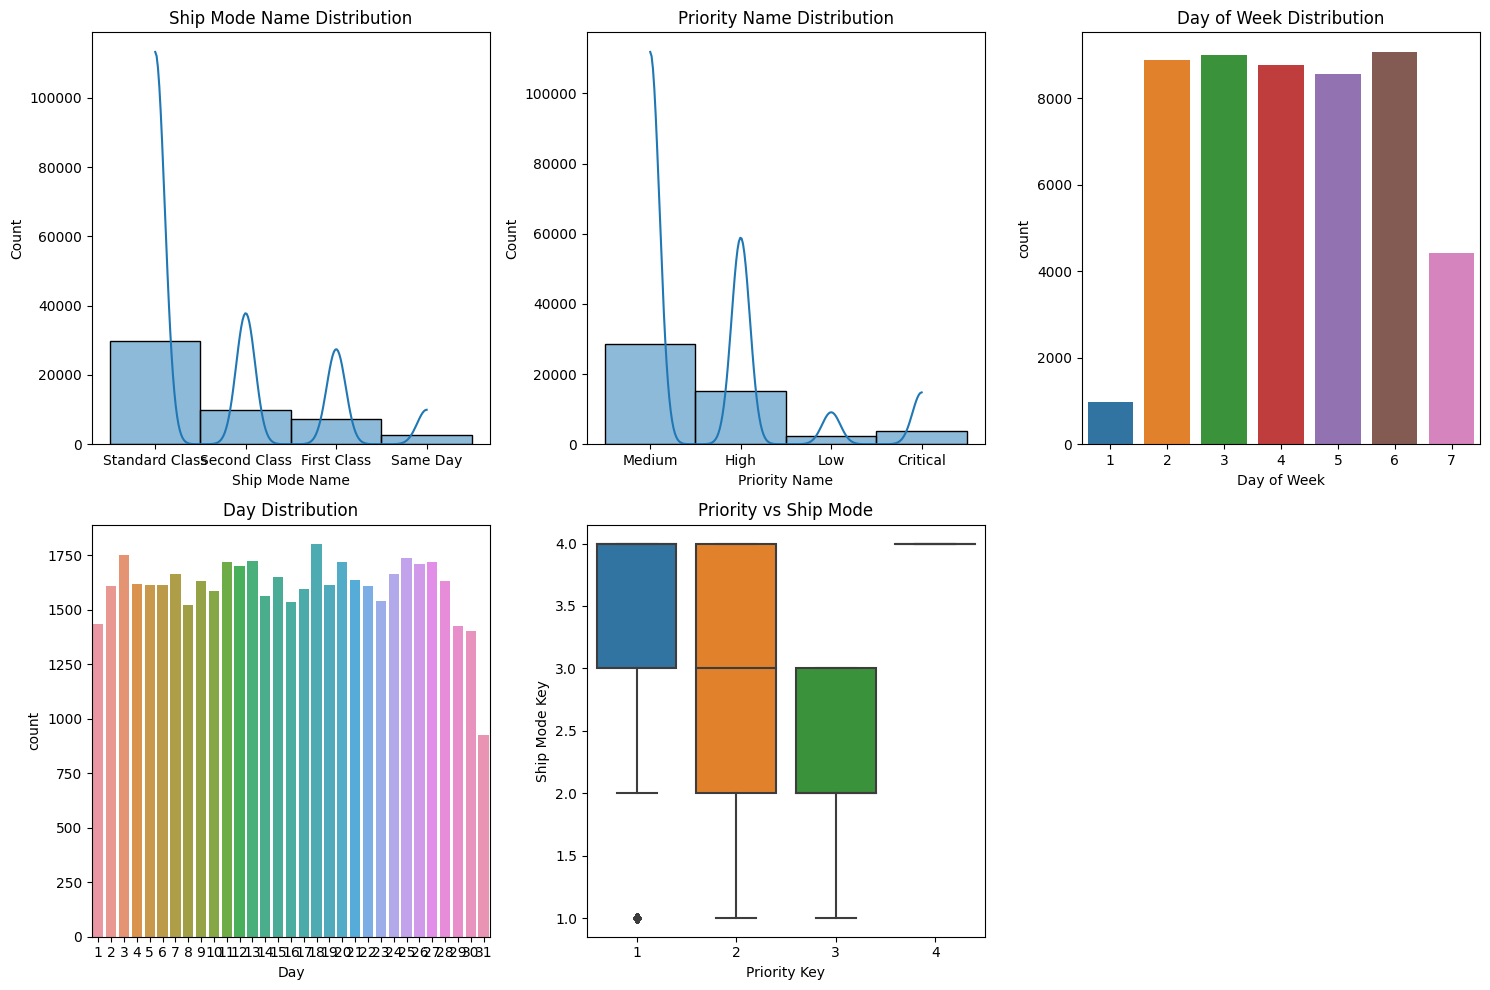

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(result['Ship Mode Name'], bins=20, kde=True)
plt.title('Ship Mode Name Distribution')

plt.subplot(2, 3, 2)
sns.histplot(result['Priority Name'], bins=20, kde=True)
plt.title('Priority Name Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Day of Week', data=result)
plt.title('Day of Week Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Day', data=result)
plt.title('Day Distribution')

plt.subplot(2, 3, 5)
sns.boxplot(x=result['Priority Key'], y=result['Ship Mode Key'])
plt.title('Priority vs Ship Mode')



plt.tight_layout()
plt.show()


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

selected_features = [
    "Sales",
    # "Quantity",
    # "Discount",
    "Profit",
    "Priority Name",
    "Market",
    "Segment",
    "City",
    "State",
    # "Country",
    # "Region",
    "Year",
    "Month",
    "Day",
    "Day of Week",
]



XCat = result.drop(columns=["Ship Mode Name"])[selected_features]
yCat = result["Ship Mode Name"].astype("category")


# XCat["profit_margin"] = XCat["Profit"] / (XCat["Sales"] + 1e-6)
# XCat["sales_per_unit"] = XCat["Sales"] / (XCat["Quantity"] + 1e-6)
# bins = [0, 0.25, 0.5, 0.75, 1.0]
# # labels = ["Low", "Potential Low", "Potential High", "High"]
# XCat["profit_margin"] = XCat["Profit"] / (XCat["Sales"] + 1e-6)
# XCat["log_sales"] = np.log1p(XCat["Sales"])
# XCat["log_profit"] = np.log1p(XCat["Profit"].clip(lower=0))
# XCat['Month_sin'] = np.sin(2 * np.pi * XCat['Month'].astype('int') / 12)
# XCat['Month_cos'] = np.cos(2 * np.pi * XCat['Month'].astype('int') / 12)
# XCat['DayOfWeek_sin'] = np.sin(2 * np.pi * XCat['Day of Week'].astype('int') / 7)
# XCat['DayOfWeek_cos'] = np.cos(2 * np.pi * XCat['Day of Week'].astype('int') / 7)


# XCat["Sales Label"] = pd.cut(
#     XCat["Sales"] / XCat["Sales"].max(), bins=bins, labels=labels, include_lowest=True
# )
# XCat["Discount Label"] = pd.cut(
#     XCat["Discount"] / XCat["Discount"].max(),
#     bins=bins,
#     labels=labels,
#     include_lowest=True,
# )



features_to_cal = XCat.columns.to_list()


cat_cols = [
    "Priority Name",
    "Market",
    "Segment",
    "City",
    "State",
    # "Region",
    "Year",
    "Month",
    "Day",
     'Day of Week',
    # "Sales Label",
    # "Discount Label",
]

label_encoders = {}

for c in cat_cols:
    if c in XCat.columns:
        # le = LabelEncoder()
        # XCat[c] = le.fit_transform(XCat[c])
        # label_encoders[c] = le
        XCat[c] = XCat[c].astype("category")
        
        
cat_features = [XCat.columns.get_loc(col) for col in cat_cols]
le = LabelEncoder()
yCat_encoded = le.fit_transform(yCat)
        
  

In [243]:
numeric_cols =  XCat.select_dtypes(exclude=['category','object']).columns.to_list()
numeric_cols

['Sales', 'Profit']

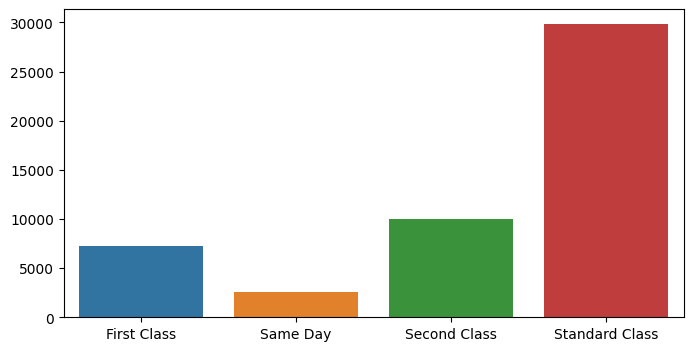

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
# sns.scatterplot(x = XCat,y=XCat,hue=yCat_encoded,ax=ax[0])
idx,c = np.unique(yCat,return_counts=True)
sns.barplot(x=idx,y=c,ax=ax)
plt.show()



In [164]:
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,4))
# # sns.scatterplot(x = XCat_resamle[:,0],y=XCat_resamle[:,1],hue=yCat,ax=ax[0])
# idx,c = np.unique(yCat_resamle,return_counts=True)
# sns.barplot(x=idx,y=c,ax=ax)
# plt.show()
XCat

,Sales,Quantity,Discount,Profit,Priority Name,Market,Segment,City,State,Region,...,Day,Day of Week,profit_margin,sales_per_unit,Sales Label,Discount Label,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
0,263.920013,2,0.0,5.240,Medium,LATAM,Consumer,Mexico City,Distrito Federal,North,...,25,3,0.019854,131.959941,Low,Low,1.224647e-16,-1.000000e+00,0.433884,-0.900969
1,8.880000,2,0.0,3.720,Medium,LATAM,Consumer,Mexico City,Distrito Federal,North,...,5,3,0.418919,4.439998,Low,Low,-5.000000e-01,8.660254e-01,0.433884,-0.900969
2,14.600000,2,0.0,5.680,Medium,LATAM,Consumer,Mexico City,Distrito Federal,North,...,5,3,0.389041,7.299997,Low,Low,-5.000000e-01,8.660254e-01,0.433884,-0.900969
3,41.639999,2,0.0,14.960,Medium,LATAM,Corporate,Mexico City,Distrito Federal,North,...,30,4,0.359270,20.819989,Low,Low,-5.000000e-01,-8.660254e-01,-0.433884,-0.900969
4,13.880000,2,0.0,1.240,Medium,LATAM,Home Office,Mexico City,Distrito Federal,North,...,29,4,0.089337,6.939997,Low,Low,-8.660254e-01,5.000000e-01,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,48.768002,3,0.2,-5.532,Medium,LATAM,Consumer,Santo Domingo,Santo Domingo,Caribbean,...,29,6,-0.113435,16.255995,Low,Low,1.224647e-16,-1.000000e+00,-0.781831,0.623490
49666,87.456001,3,0.2,-8.784,Medium,LATAM,Consumer,Santo Domingo,Santo Domingo,Caribbean,...,4,5,-0.100439,29.151991,Low,Low,-1.000000e+00,-1.836970e-16,-0.974928,-0.222521
49667,23.712000,3,0.2,-2.088,Medium,LATAM,Consumer,Santo Domingo,Santo Domingo,Caribbean,...,6,2,-0.088057,7.903997,Low,Low,5.000000e-01,8.660254e-01,0.974928,-0.222521
49668,44.784000,3,0.2,-11.196,Medium,LATAM,Corporate,Santo Domingo,Santo Domingo,Caribbean,...,21,5,-0.250000,14.927995,Low,Low,-5.000000e-01,8.660254e-01,-0.974928,-0.222521


------------------ classification_report TRAIN ------------------
                precision    recall  f1-score   support

   First Class       0.91      0.83      0.86      5424
      Same Day       0.98      0.68      0.80      1965
  Second Class       0.94      0.80      0.87      7479
Standard Class       0.90      0.99      0.94     22384

      accuracy                           0.91     37252
     macro avg       0.93      0.82      0.87     37252
  weighted avg       0.91      0.91      0.91     37252



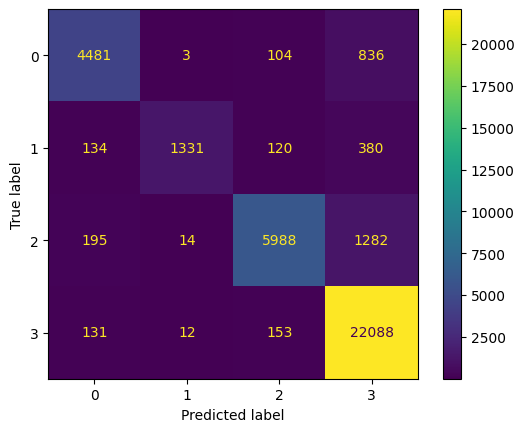

------------------ classification_report TEST ------------------
                precision    recall  f1-score   support

   First Class       0.78      0.60      0.68      1808
      Same Day       0.94      0.47      0.62       655
  Second Class       0.81      0.58      0.67      2493
Standard Class       0.81      0.96      0.88      7462

      accuracy                           0.81     12418
     macro avg       0.83      0.65      0.71     12418
  weighted avg       0.81      0.81      0.79     12418



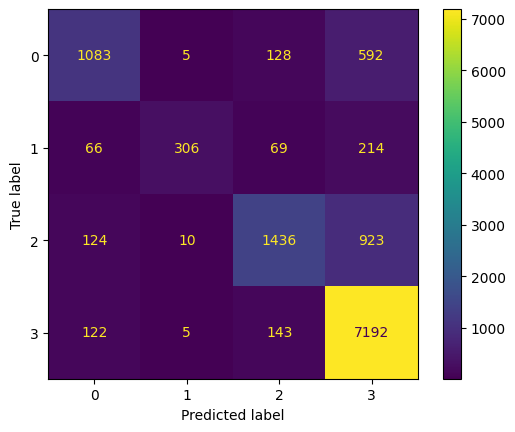

,Feature Id,Importances
0,City,37.648636
1,Priority Name,29.897034
2,Day,20.017577
3,Month,5.844042
4,Year,2.467123
5,Day of Week,1.984373
6,Market,0.892590
7,State,0.629390
8,Segment,0.432441
9,Sales,0.102646


In [256]:
robost_scaler = RobustScaler()

XC_train_n, XC_test, yC_train_n, yC_test = train_test_split(
    XCat,yCat, test_size=0.25, random_state=42, stratify=yCat
)

smote_nc = SMOTENC(categorical_features=cat_features, random_state=42)
XC_train,yC_train =XC_train_n,yC_train_n
# smote_nc.fit_resample(XC_train_n,yC_train_n)

XC_train[numeric_cols] = robost_scaler.fit_transform(XC_train[numeric_cols])
XC_test[numeric_cols] = robost_scaler.transform(XC_test[numeric_cols])

# 98-85
# 98-86
# 97-82
train_pool = Pool(XC_train, yC_train, cat_features=cat_cols)
valid_pool = Pool(XC_test, yC_test, cat_features=cat_cols)
catModel = CatBoostClassifier(
    iterations=1000,
    loss_function="MultiClass",
    eval_metric="TotalF1:average=Macro",
    depth=2,
    learning_rate=0.06,
    verbose=False,
    random_state=42,
)

catModel.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True,
    early_stopping_rounds=200,
)

y_p = catModel.predict(XC_train)
y_t = catModel.predict(XC_test)
print(f"------------------ classification_report TRAIN ------------------")
print(classification_report(yC_train, y_p))
ConfusionMatrixDisplay(confusion_matrix(yC_train, y_p)).plot()
plt.show()

print(f"------------------ classification_report TEST ------------------")
print(classification_report(yC_test, y_t))
ConfusionMatrixDisplay(confusion_matrix(yC_test, y_t)).plot()
plt.show()

catModel.get_feature_importance(prettified=True)